<a href="https://colab.research.google.com/github/O-Kpy/Kaggle/blob/main/deeplearning_tut.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import os
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split

In [ ]:
train = pd.read_csv('../input/digit-recognizer/train.csv', dtype=np.float32)
train.shape

(42000, 785)

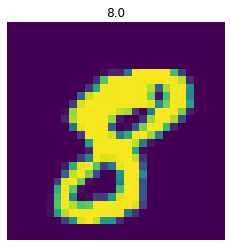

In [ ]:
targets_numpy = train.label.values
features_numpy = train.loc[:,train.columns != "label"].values/255 # normalization

# train test split. Size of train data is 80% and size of test data is 20%. 
features_train, features_test, targets_train, targets_test = train_test_split(features_numpy,
                                                                             targets_numpy,
                                                                             test_size = 0.2,
                                                                             random_state = 42) 

# create feature and targets tensor for train set. As you remember we need variable to accumulate gradients. Therefore first we create tensor, then we will create variable
featuresTrain = torch.from_numpy(features_train)
targetsTrain = torch.from_numpy(targets_train).type(torch.LongTensor) # data type is long

# create feature and targets tensor for test set.
featuresTest = torch.from_numpy(features_test)
targetsTest = torch.from_numpy(targets_test).type(torch.LongTensor) # data type is long

# batch_size, epoch and iteration
batch_size = 100
n_iters = 10000
num_epochs = n_iters / (len(features_train) / batch_size)
num_epochs = int(num_epochs)

# Pytorch train and test sets
train = torch.utils.data.TensorDataset(featuresTrain,targetsTrain)
test = torch.utils.data.TensorDataset(featuresTest,targetsTest)

# data loader
train_loader = DataLoader(train, batch_size = batch_size, shuffle = False)
test_loader = DataLoader(test, batch_size = batch_size, shuffle = False)

# visualize one of the images in data set
plt.imshow(features_numpy[10].reshape(28,28))
plt.axis("off")
plt.title(str(targets_numpy[10]))
plt.savefig('graph.png')
plt.show()

In [ ]:
targets_numpy = train.label.values
features_numpy = train.loc[:, train.columns != 'label'].values /255  # normalization

In [ ]:
features_train, features_test, targets_train, targets_test = train_test_split(features_numpy, targets_numpy, test_size=0.2, random_state=42)

In [ ]:
feature_train = torch.from_numpy(features_train)
target_train = torch.from_numpy(targets_train).type(torch.LongTensor)

feature_test = torch.from_numpy(features_test)
target_test = torch.from_numpy(targets_test).type(torch.LongTensor)

In [ ]:
batch_size=100
n_iters=10000
num_epochs = n_iters / (len(feature_train)/batch_size)
num_epochs = int(num_epochs)

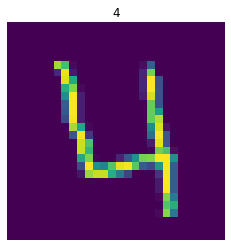

In [ ]:
train = torch.utils.data.TensorDataset(feature_train, target_train)
test = torch.utils.data.TensorDataset(feature_test, target_test)

import matplotlib.pyplot as plt
plt.imshow(features_numpy[3].reshape(28, 28))
plt.axis('off')
plt.title(str(targets_numpy[3]))
plt.savefig('graph.png')
plt.show()

In [ ]:
train_loader = DataLoader(train, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test, batch_size=batch_size, shuffle=False)

In [ ]:
# Create Logistic Regression Model
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegressionModel, self).__init__()
        # Linear part
        self.linear = nn.Linear(input_dim, output_dim)
        # There should be logistic function right?
        # However logistic function in pytorch is in loss function
        # So actually we do not forget to put it, it is only at next parts
    
    def forward(self, x):
        out = self.linear(x)
        return out

# Instantiate Model Class
input_dim = 28*28 # size of image px*px
output_dim = 10  # labels 0,1,2,3,4,5,6,7,8,9

# create logistic regression model
model = LogisticRegressionModel(input_dim, output_dim)

# Cross Entropy Loss  
error = nn.CrossEntropyLoss()

# SGD Optimizer 
learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
# Create ANN Model
class ANNModel(nn.Module):
    
    def __init__(self):
        super(ANNModel, self).__init__()
        
        # Linear function 1: 784 --> 150
        self.fc1 = nn.Linear(784, 150) 
        # Non-linearity 1
        self.relu1 = nn.ReLU()
        
        # Linear function 2: 150 --> 150
        self.fc2 = nn.Linear(150, 150)
        # Non-linearity 2
        self.tanh2 = nn.Tanh()
        
        # Linear function 3: 150 --> 150
        self.fc3 = nn.Linear(150, 150)
        # Non-linearity 3
        self.elu3 = nn.ELU()
        
        # Linear function 4 (readout): 150 --> 10
        self.fc4 = nn.Linear(150, 10)  
    
    def forward(self, x):
        # Linear function 1
        out = self.fc1(x)
        # Non-linearity 1
        out = self.relu1(out)
        
        # Linear function 2
        out = self.fc2(out)
        # Non-linearity 2
        out = self.tanh2(out)
        
        # Linear function 2
        out = self.fc3(out)
        # Non-linearity 2
        out = self.elu3(out)
        
        # Linear function 4 (readout)
        out = self.fc4(out)
        return out

# Create ANN
model = ANNModel()

# Cross Entropy Loss 
error = nn.CrossEntropyLoss()

# SGD Optimizer
learning_rate = 0.02
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
count = 0
loss_list = []
iteration_list = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        train = Variable(images.view(-1, 28*28))
        labels = Variable(labels)
        
        # Clear gradients
        optimizer.zero_grad()
        
        # Forward propagation
        outputs = model(train)
        
        # Calculate softmax and cross entropy loss
        loss = error(outputs, labels)
        
        # Calculate gradients
        loss.backward()
        
        # Update parameters
        optimizer.step()
        
        count += 1
        
        # Prediction
        if count % 50 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Predict test dataset
            for images, labels in test_loader: 
                test = Variable(images.view(-1, 28*28))
                
                # Forward propagation
                outputs = model(test)
                
                # Get predictions from the maximum value
                predicted = torch.max(outputs.data, 1)[1]
                
                # Total number of labels
                total += len(labels)
                
                # Total correct predictions
                correct += (predicted == labels).sum()
            
            accuracy = 100 * correct / float(total)
            
            # store loss and iteration
            loss_list.append(loss.data)
            iteration_list.append(count)
        if count % 500 == 0:
            # Print Loss
            print('Iteration: {}  Loss: {}  Accuracy: {}%'.format(count, loss.data, accuracy))

Iteration: 500  Loss: 0.06558701395988464  Accuracy: 96.29762268066406%
Iteration: 1000  Loss: 0.03357722610235214  Accuracy: 96.52381134033203%
Iteration: 1500  Loss: 0.025779414921998978  Accuracy: 96.52381134033203%
Iteration: 2000  Loss: 0.056707873940467834  Accuracy: 96.48809814453125%
Iteration: 2500  Loss: 0.06658922880887985  Accuracy: 96.67857360839844%
Iteration: 3000  Loss: 0.019078457728028297  Accuracy: 96.72618865966797%
Iteration: 3500  Loss: 0.044243354350328445  Accuracy: 96.78571319580078%
Iteration: 4000  Loss: 0.009329624474048615  Accuracy: 96.96428680419922%
Iteration: 4500  Loss: 0.036622341722249985  Accuracy: 96.79762268066406%
Iteration: 5000  Loss: 0.02065420150756836  Accuracy: 96.95237731933594%
Iteration: 5500  Loss: 0.0539683923125267  Accuracy: 96.71428680419922%
Iteration: 6000  Loss: 0.021009664982557297  Accuracy: 96.95237731933594%
Iteration: 6500  Loss: 0.04387672245502472  Accuracy: 96.97618865966797%
Iteration: 7000  Loss: 0.020674025639891624  A

In [ ]:
torch.max(outputs, 1)[1]

tensor([1, 2, 3, 5, 4, 3, 3, 9, 0, 1, 3, 9, 5, 8, 9, 4, 2, 1, 0, 9, 7, 6, 0, 6,
        7, 0, 0, 5, 8, 8, 1, 1, 5, 6, 9, 6, 8, 9, 7, 8, 1, 3, 8, 7, 6, 6, 2, 0,
        9, 5, 1, 7, 5, 2, 7, 0, 2, 2, 2, 5, 2, 5, 5, 6, 7, 6, 6, 1, 0, 1, 1, 4,
        9, 6, 5, 1, 6, 1, 1, 0, 1, 1, 7, 4, 7, 0, 1, 7, 2, 2, 1, 7, 7, 3, 2, 9,
        9, 2, 6, 0])

In [ ]:
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=5, stride=1, padding=0)
        self.relu1 = nn.ReLU()
        
        self.maxpool1 = nn.MaxPool2d(kernel_size=2)
        
        self.cnn2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, stride=1, padding=0)
        self.relu2 = nn.ReLU()
        
        self.maxpool2 = nn.MaxPool2d(kernel_size=2)
        
        self.fc1 = nn.Linear(32*4*4, 10)
    
    def forward(self, x):
        
        out=self.cnn1(x)
        out=self.relu1(out)
        
        out=self.maxpool1(out)
        
        out=self.cnn2(out)
        out=self.relu2(out)
        
        out=self.maxpool2(out)
        
        out=out.view(out.size(0), -1)
        
        out=self.fc1(out)
        
        return out

batch_size=100
n_iters=2500
num_epochs = n_iters / (len(features_train)/batch_size)
num_epochs = int(num_epochs)

train = torch.utils.data.TensorDataset(featuresTrain, targetsTrain)
test = torch.utils.data.TensorDataset(featuresTest, targetsTest)

train_loader = torch.utils.data.DataLoader(train, batch_size=batch_size, shuffle=False)
test_loader = torch.utils.data.DataLoader(test, batch_size=batch_size, shuffle=False)

model=CNNModel()

error = nn.CrossEntropyLoss()

learning_rate=0.1
optimizer=torch.optim.SGD(model.parameters(), lr=learning_rate)
print(model)

CNNModel(
  (cnn1): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1))
  (relu1): ReLU()
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (cnn2): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1))
  (relu2): ReLU()
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=512, out_features=10, bias=True)
)


In [ ]:
for images, labels in train_loader:
    print(images.size(), labels.size())
    break

torch.Size([100, 784]) torch.Size([100])


In [ ]:
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
count = 0
loss_list = []
iteration_list = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        train = Variable(images.view(100, 1, 28, 28))
        labels = Variable(labels)
        
        # Clear gradients
        optimizer.zero_grad()
        
        # Forward propagation
        outputs = model(train)
        
        # Calculate softmax and cross entropy loss
        loss = error(outputs, labels)
        
        # Calculate gradients
        loss.backward()
        
        # Update parameters
        optimizer.step()
        
        count += 1
        
        # Prediction
        if count % 50 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Predict test dataset
            for images, labels in test_loader: 
                test = Variable(images.view(100, 1, 28, 28))
                
                # Forward propagation
                outputs = model(test)
                
                # Get predictions from the maximum value
                predicted = torch.max(outputs.data, 1)[1]
                
                # Total number of labels
                total += len(labels)
                
                # Total correct predictions
                correct += (predicted == labels).sum()
            
            accuracy = 100 * correct / float(total)
            
            # store loss and iteration
            loss_list.append(loss.data)
            iteration_list.append(count)
        if count % 500 == 0:
            # Print Loss
            print('Iteration: {}  Loss: {}  Accuracy: {}%'.format(count, loss.data, accuracy))

Iteration: 500  Loss: 0.09633925557136536  Accuracy: 96.5952377319336%
Iteration: 1000  Loss: 0.04455050453543663  Accuracy: 97.64286041259766%
Iteration: 1500  Loss: 0.035635627806186676  Accuracy: 97.94047546386719%
Iteration: 2000  Loss: 0.014624148607254028  Accuracy: 98.30952453613281%
